In [1]:
!wget -P /tmp  https://storage.googleapis.com/download.tensorflow.org/data/rps.zip
!wget -P /tmp  https://storage.googleapis.com/download.tensorflow.org/data/rps-test-set.zip

--2025-05-23 06:12:19--  https://storage.googleapis.com/download.tensorflow.org/data/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.207.251, 142.250.194.59, 142.250.194.251, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.207.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

rps.zip             100%[===================>] 191.38M  8.35MB/s    in 25s     

2025-05-23 06:12:47 (7.75 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2025-05-23 06:12:47--  https://storage.googleapis.com/download.tensorflow.org/data/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.194.155, 172.217.167.219, 142.250.194.251, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.194.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp

In [2]:
import os
import zipfile

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [3]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock01-105.png', 'rock07-k03-059.png', 'rock05ck01-081.png', 'rock04-089.png', 'rock03-111.png', 'rock07-k03-051.png', 'rock06ck02-027.png', 'rock05ck01-110.png', 'rock03-059.png', 'rock01-031.png']
['paper06-108.png', 'paper05-076.png', 'paper03-077.png', 'paper07-079.png', 'paper07-057.png', 'paper03-003.png', 'paper01-104.png', 'paper02-049.png', 'paper05-065.png', 'paper07-059.png']
['scissors02-070.png', 'scissors01-113.png', 'testscissors02-110.png', 'testscissors03-019.png', 'testscissors03-065.png', 'testscissors02-068.png', 'testscissors03-022.png', 'scissors04-007.png', 'testscissors02-000.png', 'testscissors02-019.png']


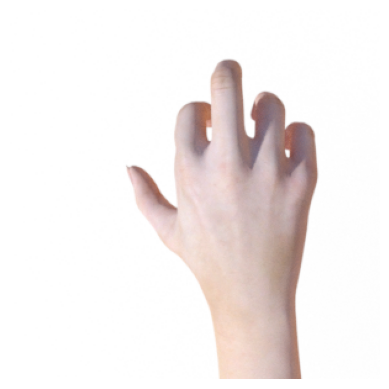

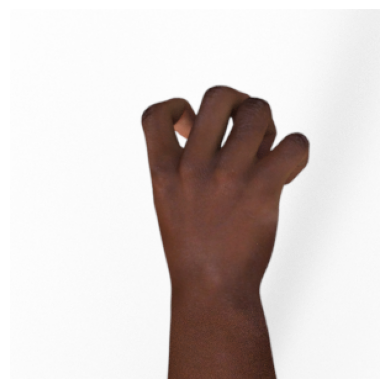

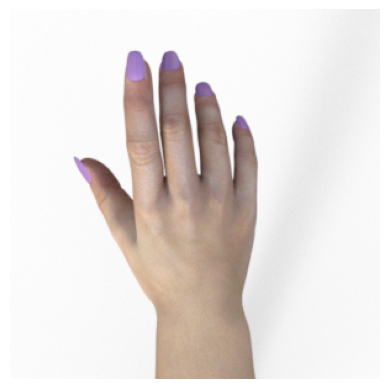

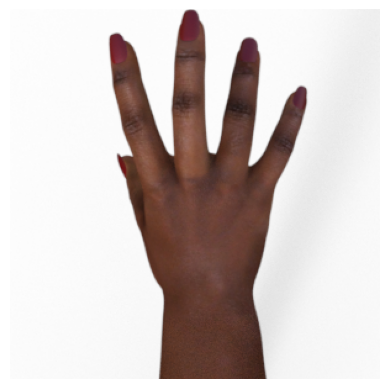

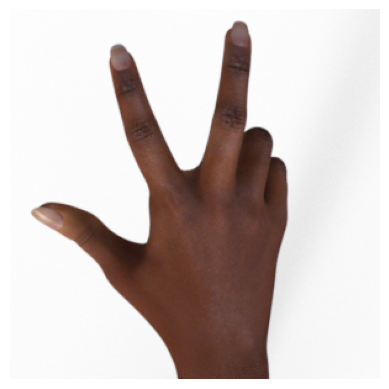

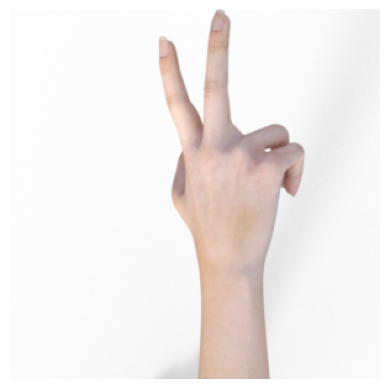

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [6]:
import gc
import tensorflow.keras.backend as K

K.clear_session()
gc.collect()
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,473,475 (13.25 MB)

 Trainable params: 3,473,475 (13.25 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25


2025-05-23 06:31:58.431232: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_633', 48 bytes spill stores, 48 bytes spill loads

2025-05-23 06:31:58.432288: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_633', 208 bytes spill stores, 208 bytes spill loads

2025-05-23 06:31:58.818221: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_633', 264 bytes spill stores, 264 bytes spill loads



20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 236ms/step - accuracy: 0.4155 - loss: 1.2900 - val_accuracy: 0.3229 - val_loss: 1.0886
Epoch 2/25
13/20 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.4098 - loss: 1.1044

2025-05-23 06:32:11.832831: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_633', 4 bytes spill stores, 4 bytes spill loads

2025-05-23 06:32:12.001872: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_633', 8 bytes spill stores, 8 bytes spill loads

2025-05-23 06:32:12.228148: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_633', 124 bytes spill stores, 124 bytes spill loads

2025-05-23 06:32:12.348846: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_633', 256 bytes spill stores, 256 bytes spill loads

2025-05-23 06:32:12.470120: I external/local

20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 456ms/step - accuracy: 0.4024 - loss: 1.1065 - val_accuracy: 0.4896 - val_loss: 1.0757
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.4098 - loss: 1.0861 - val_accuracy: 0.5625 - val_loss: 0.9585
Epoch 4/25
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.4566 - loss: 1.0544

/home/mohan/anaconda3/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.4576 - loss: 1.0523 - val_accuracy: 0.5312 - val_loss: 0.8366
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.5164 - loss: 1.0196 - val_accuracy: 0.7917 - val_loss: 0.8227
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 297ms/step - accuracy: 0.5660 - loss: 0.9057 - val_accuracy: 0.8750 - val_loss: 0.5252
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.6399 - loss: 0.8108 - val_accuracy: 0.7188 - val_loss: 0.5585
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.6742 - loss: 0.7172 - val_accuracy: 0.6562 - val_loss: 0.5093
Epoch 9/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - accuracy: 0.6593 - loss: 0.7427 - val_accuracy: 0.8854 - val_loss: 0.3167
Epoch 10/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.7641 - loss: 0.5833 - val_accuracy: 0.8854 - val_loss: 0.2821
Epoch 11/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.7699 - loss: 0.5285 - val_accuracy: 0.9375 - va

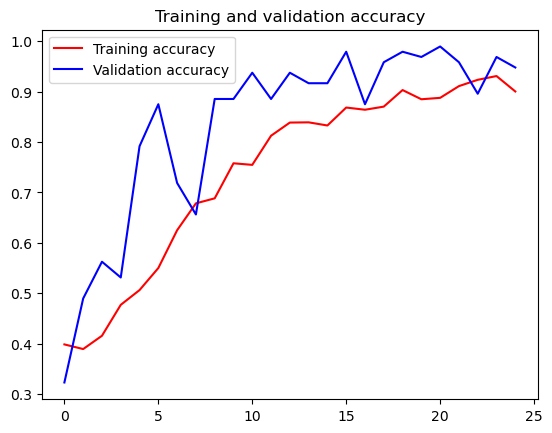

<Figure size 640x480 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()